#### [산점도 그래프]
 - 두개의 칼럼(변수)의 관계를 시각화해서 표현
 - 연속형(수치형) 데이터에 사용

In [2]:
# [1] 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# [2] Data 준비
F_DATA = R"C:\Hwan\Pandas_ex\DATA\auto_mpg.csv"

In [4]:
# [3] CSV => DataFrame으로 저장
dataDF = pd.read_csv(F_DATA)

In [5]:
# 컬러별 타입
dataDF.dtypes

# mpg = 연비

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
dataDF.corr(numeric_only = True)
corrSR = dataDF.corr(numeric_only = True)["mpg"]
round(corrSR["weight"], 2)
corrSR
# 값이 높은 것이 관련이 있음 // 음수면 반비례 관계

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

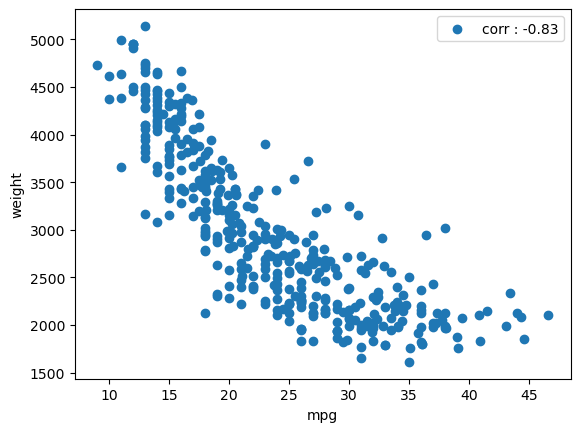

In [7]:
# - [4-2] 시각화
# plt.scatter(x 값, y 값)
plt.scatter(dataDF.mpg, dataDF.weight, label = f"corr : {round(corrSR['weight'], 2)}")
plt.xlabel("mpg")
plt.ylabel("weight")
# plt.set(xlabel = "mpg", ylabel = "weight")
plt.legend()
plt.show()

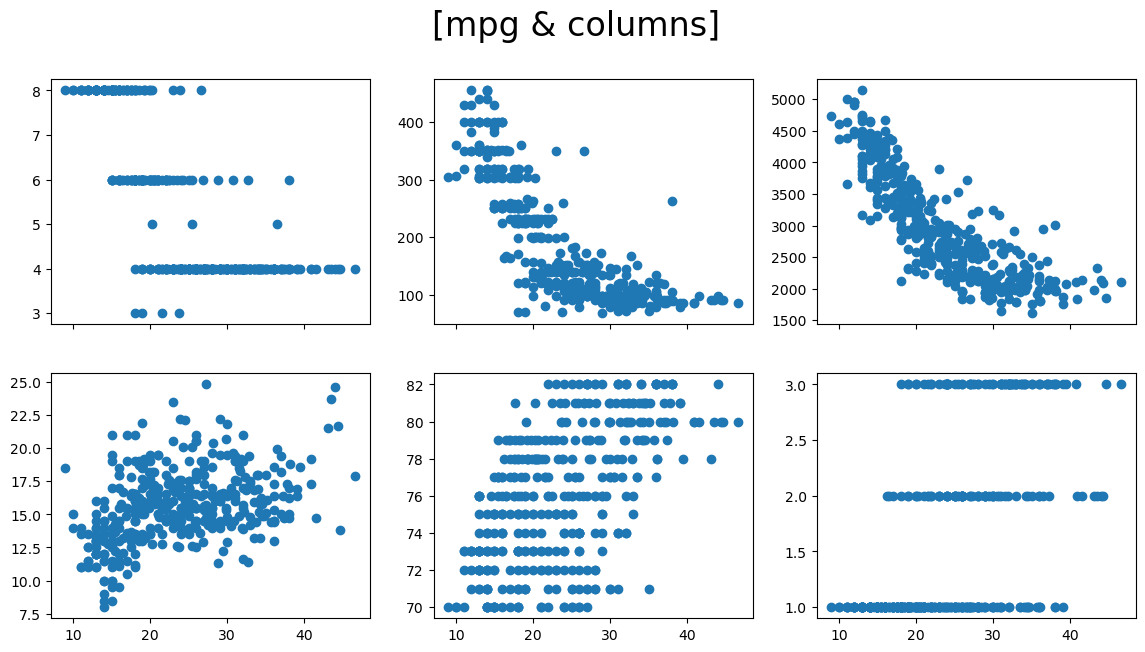

In [9]:
# - [4-3] mpg 칼럼과 다른 칼럼관의 관계 시각화
# 1) 그래프 담을 창 생성
fig = plt.figure(figsize = (14, 7))

# 2) 그래프 담을 공간 생성
axs = fig.subplots(2, 3, sharex = True)
for row in range(2) :
    for col in range(3) :
        col_name = corrSR.index[row*3+col+1]
        axs[row, col].scatter(dataDF["mpg"],
                              dataDF[col_name],
                              label = f"corr : {round(corrSR[col_name], 2)}")

fig.suptitle("[mpg & columns]", fontsize = 24)
plt.show()
    

    # ax.scatter(dataDF["mpg"], dataDF[corrSR.index[idx+1]])
    # ax.xlabel("mpg")

# for x in corrSR.index[1:] :
    
#     round(corrSR[x], 2)
#     plt.scatter(dataDF.mpg, dataDF[x], label = f"corr : {round(corrSR[x], 2)}")
#     plt.xlabel("mpg")
#     plt.ylabel(x)
#     plt.legend()
 
#     plt.show()